In [73]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [74]:
base_dir = r"C:\Users\ahmad\OneDrive\Documents\PythonProjects\Health Care\Cancer Detection"
train_dir = os.path.join(base_dir, 'train')
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),  batch_size=20,
    class_mode='binary' )

Found 11879 images belonging to 2 classes.


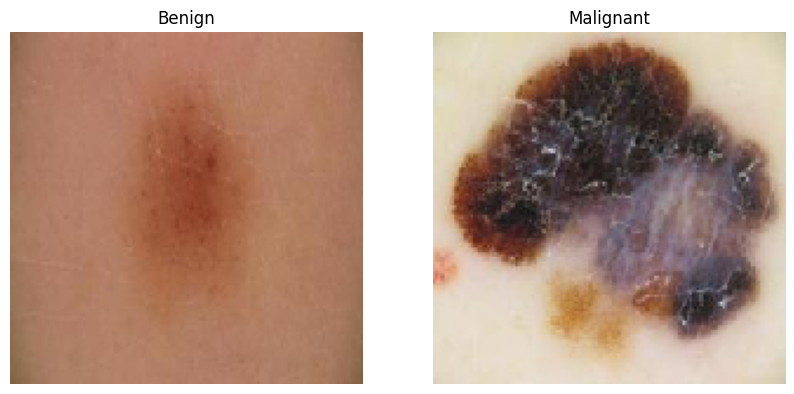

In [75]:
class_labels = sorted(os.listdir(train_dir))
images, labels = next(train_generator)

plt.figure(figsize=(10, 6))
for i, class_name in enumerate(class_labels):
    plt.subplot(1, len(class_labels), i + 1)
    plt.imshow(images[i])
    plt.title(class_name)
    plt.axis('off')

plt.show()

In [77]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

# Train the model using the data provided by train_generator
Result = model.fit(train_generator,steps_per_epoch=100, epochs=15,verbose=1)

Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 70s 668ms/step - accuracy: 0.5470 - loss: 10.9515
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 68s 678ms/step - accuracy: 0.7599 - loss: 0.5017
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 660ms/step - accuracy: 0.7928 - loss: 0.4371
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 638ms/step - accuracy: 0.7912 - loss: 0.4527
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 624ms/step - accuracy: 0.8257 - loss: 0.3828
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 592ms/step - accuracy: 0.8358 - loss: 0.3568
Epoch 7/15


c:\Users\ahmad\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 65s 644ms/step - accuracy: 0.8136 - loss: 0.3911
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 609ms/step - accuracy: 0.8209 - loss: 0.3835
Epoch 9/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 368ms/step - accuracy: 0.8125 - loss: 0.4058
Epoch 10/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 249ms/step - accuracy: 0.8512 - loss: 0.3438
Epoch 11/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 254ms/step - accuracy: 0.8558 - loss: 0.3470
Epoch 12/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 228ms/step - accuracy: 0.8426 - loss: 0.3704
Epoch 13/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 245ms/step - accuracy: 0.8409 - loss: 0.3479
Epoch 14/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - accuracy: 0.8425 - loss: 0.3546
Epoch 15/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - accuracy: 0.8657 - loss: 0.3062


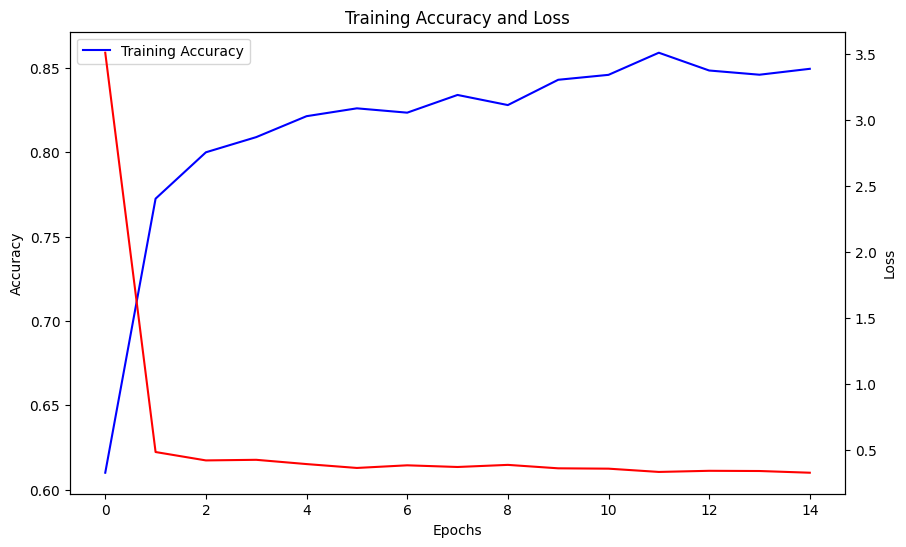

In [80]:
# Create a single plot for accuracy and loss
plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.plot(Result.history['accuracy'], label='Training Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy and Loss')
plt.legend()

# Plot training loss
plt.twinx()  # Create a twin y-axis for loss
plt.plot(Result.history['loss'], label='Training Loss', color='red')
plt.ylabel('Loss')

plt.show()

In [82]:
test_dir = os.path.join(base_dir, 'test')
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,target_size=(150, 150), batch_size=20,class_mode='binary', 
    shuffle=False  
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Loss: {test_loss:.2f}")

Found 2000 images belonging to 2 classes.
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.8783 - loss: 0.3169
Test Accuracy: 0.84
Test Loss: 0.39


In [98]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

image_size = (150, 150)

def predict_class(image):
    prediction = model.predict(image)
    return 'Malignant' if prediction[0][0] > 0.5 else 'Benign'

def open_file():
    """Open a file dialog to select an image, and predict its class."""
    file_path = filedialog.askopenfilename()
    if file_path:
        # Display the image
        img = Image.open(file_path)
        img = img.resize(image_size)
        img_tk = ImageTk.PhotoImage(img)
        image_label.config(image=img_tk)
        image_label.image = img_tk  
       
        # Predict and display the class
        image = np.array(img) / 255.0
        image = np.expand_dims(image, axis=0) 
        class_result = predict_class(image)
        result_var.set(f'Predicted Class: {class_result}') 

  
# Create the main window
root = tk.Tk()
root.title('Skin_Cancer_Detection')

# Label to display the selected image
image_label = tk.Label(root)
image_label.pack()

# Button to open the file dialog
open_button = tk.Button(root, text='Open Image', command=open_file)
open_button.pack()

# Variable to hold the prediction result
result_var = tk.StringVar()
# Label to display the prediction result
result_label = tk.Label(root, textvariable=result_var, fg='red', font=('Helvetica', 12, 'bold'))
result_label.pack()

# Run the application
root.mainloop()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
